<a href="https://colab.research.google.com/github/Tavo826/DataScience/blob/main/DetectingFakeNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TfidfVectorizer

**TF (Term Frequency):** El número de veces que una palabra aparece en un documento. Un valo ralto significa que un término aparece más amenudo que otros, además, el documento es una buena coincidencia cuando el término hace parte de los términos de búsqueda.

**IDF (Inverse Document Frequency):** Palabras que aparecen muchas veces en el documento, pero también aparecen muchas veces en muchos otros, puede ser irrelevante. Es una medida de cuán significante es un término en el cuerpo del texto.

El TfidfVectorizer cpnvierte una colección de documentos en una matriz de características TF-IDF.

## PassiveAggressiveClassifier

Son algoritmos de aprendizaje online. Este permanece pasivo para un resultado de clasificación correcto y se vuelve agresivo en caso de un error de cálculo, actualización y ajuste. Este algoritmo no converge, su propósito es hacer actualizaciones que corrige la pérdida, causando un pequeño cambio en la norma del vector de pesos.

## Dataset

news.csv tiene un tamaño de 7796x4. La primera columna identifica la columna, la segunda y tercera son el título y el texto, y la cuarta contiene las etiquetas que denotan si es REAL o FAKE. 

In [ ]:
import os
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

os.chdir('/content/drive/MyDrive/Colab Notebooks/Data Science/Detección de noticias falsas')

In [ ]:
df = pd.read_csv('news.csv')

print(df.shape)
df.head(10)

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [ ]:
#Obteniendo las etiquetas
labels = df.label
#Separando el dataset en train y test
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.2, random_state=7)

Se inicializa el TfidfVectorizer con palabras vaciás del inglés y una frecuencia de documento máima de 0.7 (se descartan los términos con una frecuencia de documento mayor). Las palabras vacías son las palabras más comunes en un idioma que se deben filtrar antes de procesar los datos del lenguaje natural

In [ ]:
#inicializando TfidfVectorizer()
tfidf_vctorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

#fit_transform y transform
tfidf_train = tfidf_vctorizer.fit_transform(x_train)
tfidf_test = tfidf_vctorizer.transform(x_test)

In [ ]:
#inicializando PassiveAggressiveClassifier()
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

#Realizando predicción
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100,2)}')

Accuracy: 93.13


In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False,
                          title=None, cmap=plt.cm.Blues):
  
  if not title:
    if normalize:
      title = 'Normalized confusion matrix'
    else:
      title = 'Confusion matrix, without normalization'
  
  #Calulando la matriz de confusión
  cm = confusion_matrix(y_true, y_pred)
  print(cm)
  #Solo se usan las etiquetas que aparecen en los datos
  #classes = classes[unique_labels(y_true, y_pred)]
  if normalize: cm = 100 * cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

  fig, ax = plt.subplots()
  im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
  ax.figure.colorbar(im, ax=ax)

  #mostrando las etiquetas
  ax.set(xticks = np.arange(cm.shape[1]),
         yticks = np.arange(cm.shape[0]),
         xticklabels = classes, yticklabels=classes, 
         title = title,
         ylabel = 'True label',
         xlabel = 'Predicted label')
  
  #rotando los ejes
  plt.setp(ax.get_xticklabels(), rotation=45, ha='right',
           rotation_mode='anchor')
  
  #Se recorren las dimensiones de los datos y se crean las anotaciones
  fmt = '.1f' if normalize else 'd'
  thresh = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      ax.text(j, i, format(cm[i,j], fmt),
              ha='center', va='center',
              color='white' if cm[i,j] > thresh else 'black')
  fig.tight_layout()
  return ax

[[593  45]
 [ 42 587]]
              precision    recall  f1-score   support

        FAKE       0.93      0.93      0.93       638
        REAL       0.93      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



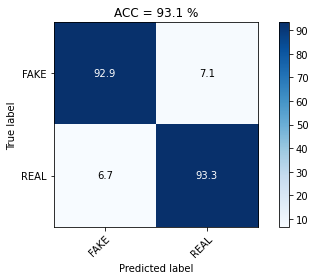

In [ ]:
plot_confusion_matrix(y_test, y_pred,
                      classes=np.unique(labels),
                      normalize=True,
                      title='ACC = %.1f %%' % (100*score))

cr = classification_report(y_test, y_pred,
                           #labels = range(len(np.unique(labels))),
                           target_names = np.unique(labels))

print(cr) #Algo anda mal???

In [ ]:
confusion_matrix(y_test, y_pred)

array([[593,  45],
       [ 42, 587]])